In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from scipy import stats

# Market Analysis of Offering Preferential Time Deposit Rates
## Problem Statement

The objective of this study is to conduct a comprehensive market analysis of individuals who are interested in obtaining better TD (Time Deposit) rates in order to assess the potential market share for such offerings. The main focus will be on processing BPI and competitor time deposit rates data. Through data analysis, the aim is to create a projection table that estimates the number of clients interested in specific TD rates (Y rate) to better understand the demand for these products. Additionally, if feasible, we will explore and identify the characteristics of clients who are more likely to seek preferential TD rates, such as their location, demographics, and financial behaviors. The findings from this research will enable BPI to tailor their offerings and marketing strategies to cater to the needs of its customers.

## Data Understanding

In [2]:
TD_Rates = pd.read_excel("BPI CW1.xlsx", sheet_name = 0)
TD_Rates_bin = pd.read_excel("BPI CW1.xlsx", sheet_name = 1)
DLA_Share = pd.read_excel("BPI CW1.xlsx", sheet_name = 2)
DLA_Region = pd.read_excel("BPI CW1.xlsx", sheet_name = 3)
Market_Share = pd.read_excel("BPI CW1.xlsx", sheet_name = 4)
Deposit_Ranges = pd.read_excel("BPI CW1.xlsx", sheet_name = 5)

In [3]:
pd.options.display.float_format = '{:20,.4f}'.format


In [4]:
TD_Rates.head()

,Company,Rate,Length in Days,Minimum,Maximum,Range
0,BPI,0.1875,35.0000,50000,"500,000.0000","450,000.0000"
1,BPI,0.1875,NaN,500000,"1,000,000.0000","500,000.0000"
2,BPI,0.1875,NaN,1000000,"5,000,000.0000","4,000,000.0000"
3,BPI,0.1875,NaN,5000000,NaN,NaN
4,BPI,0.1875,63.0000,50000,"500,000.0000","450,000.0000"


In [5]:
TD_Rates_bin.head()

,Company,Rate,Length in Days,Minimum,Maximum
0,BPI,0.1875,180,5000,50000
1,BPI,0.1875,180,50000,250000
2,BPI,0.1875,180,250000,1000000
3,BPI,0.1875,180,1000000,5000000
4,BPI,0.2500,180,5000000,up wards


In [6]:
DLA_Share.head()

,Company,Year,Demand (in mil),Savings (in mil),Time (in mil),Total
0,BDO,2021,"404,568.0000","2,000,245.0000","416,083.0000",2820896
1,BDO,2020,"314,256.0000","1,810,164.0000","485,731.0000",2610151
2,BDO,2019,"485,731.0000","1,589,639.0000","662,594.0000",2737964
3,BDO,2018,"179,944.0000","1,505,680.0000","734,341.0000",2419965
4,BDO,2017,"134,931.0000","1,409,256.0000","576,825.0000",2121012


In [7]:
DLA_Region = DLA_Region.iloc[:,:6]
DLA_Region.head()

,Year,Region,Demand,Savings,Time,Total
0,"2,022.0000",National Capital Region,"2,912,412.1470","5,115,954.0740","3,462,328.9550","11,490,695.1800"
1,"2,022.0000",Region I (Ilocos Region),"106,151.0810","215,019.6111","28,838.4727","350,009.1647"
2,"2,022.0000",Region II (Cagayan Valley),"85,621.0225","99,066.2002","17,484.2654","202,171.4880"
3,"2,022.0000",Region III (Central Luzon),"283,914.6037","552,633.4915","113,524.7016","950,072.7968"
4,"2,022.0000",Region IV-A (CALABARZON),"363,628.4214","777,827.1807","144,097.8523","1,285,553.4540"


In [8]:
Deposit_Ranges.head()

,Company,Range,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Total,"P5,000 - P50,000 (agg.)","230,113.0000","211,784.0000","191,434.0000","168,026.0000","148,426.0000","146,669.0000","113,025.0000","87,229.0000","119,777.0000","121,564.0000","131,016.0000"
1,Total,"P50,000 - P250,000 (agg.)","450,384.0000","397,338.0000","376,334.0000","344,220.0000","307,979.0000","287,617.0000","309,526.0000","301,037.0000","276,829.0000","269,037.0000","262,847.0000"
2,Total,"P250,000 - P1,000,000 (agg.)","363,289.0000","347,954.0000","357,625.0000","353,287.0000","344,310.0000","345,715.0000","344,343.0000","341,661.0000","331,102.0000","287,894.0000","280,733.0000"
3,Total,"P1,000,000 - P5,000,000 (agg.)","163,431.0000","200,712.0000","210,840.0000","217,851.0000","218,857.0000","232,732.0000","178,959.0000","204,267.0000","157,588.0000","162,227.0000","179,851.0000"
4,Total,"Over P5,000,000",NaN,NaN,NaN,NaN,NaN,NaN,"107,158.0000","100,052.0000","74,563.0000","75,350.0000","104,603.0000"


In [9]:
DLA_Region[DLA_Region["Year"] == 2021]

,Year,Region,Demand,Savings,Time,Total
17,"2,021.0000",National Capital Region,"2,858,509.7330","4,810,905.0790","2,780,661.7680","10,450,076.5800"
18,"2,021.0000",Region I (Ilocos Region),"96,743.1162","189,441.1913","27,281.7301","313,466.0375"
19,"2,021.0000",Region II (Cagayan Valley),"72,626.6516","96,036.9866","14,964.4671","183,628.1053"
20,"2,021.0000",Region III (Central Luzon),"253,686.5927","517,732.1584","95,437.0084","866,855.7594"
21,"2,021.0000",Region IV-A (CALABARZON),"308,092.8775","726,578.1181","127,549.0289","1,162,220.0240"
22,"2,021.0000",Region IV-B (MIMAROPA),"46,892.5141","58,731.0063","4,871.1127","110,494.6331"
23,"2,021.0000",Region V (Bicol Region),"81,126.6930","112,383.7993","15,388.5808","208,899.0731"
24,"2,021.0000",Region VI (Western Visayas),"159,176.0256","237,958.0741","44,940.4152","442,074.5149"
25,"2,021.0000",Region VII (Central Visayas),"270,340.1786","405,060.9432","93,618.0950","769,019.2168"
26,"2,021.0000",Region VIII (Eastern Visayas),"78,951.6793","70,935.8487","9,396.0111","159,283.5391"


In [10]:
DLA_Total = pd.DataFrame(columns = DLA_Share.columns)
for year in range(2012, 2022):
    DLA_Total.loc[-1] = ['All companies', year] + list(DLA_Region[DLA_Region["Year"] == year].iloc[:,2:].sum())
    DLA_Total.index = DLA_Total.index + 1
    DLA_Total.sort_index()
DLA_Total.reindex(index=DLA_Total.index[::-1])
#DLA_Total.loc[-1] = [2022, 'Philippines'] + list(DLA_Region[DLA_Region["Year"] == 2022].iloc[:,2:].sum())

    

,Company,Year,Demand (in mil),Savings (in mil),Time (in mil),Total
0,All companies,2021,"4,802,170.6512","7,874,537.4743","3,317,010.7921","15,993,718.9170"
1,All companies,2020,"4,082,890.3968","7,188,536.4344","3,382,835.6104","14,654,262.4419"
2,All companies,2019,"3,379,501.0065","6,172,694.6875","3,838,966.9544","13,391,162.6483"
3,All companies,2018,"2,921,301.8095","6,008,452.3185","3,572,105.2469","12,501,859.3748"
4,All companies,2017,"2,696,299.4857","5,556,328.2588","3,256,580.3804","11,509,208.1249"
5,All companies,2016,"2,266,121.6371","5,124,555.5763","2,808,309.6431","10,198,986.8568"
6,All companies,2015,"1,980,169.3096","4,404,211.0652","2,522,634.2922","8,907,014.6670"
7,All companies,2014,"1,746,200.9539","3,999,641.1921","2,604,190.5623","8,350,032.7084"
8,All companies,2013,"1,585,546.0765","3,543,086.2201","2,334,787.1957","7,463,419.4922"
9,All companies,2012,"1,144,680.7090","2,773,416.0790","1,718,818.1920","5,636,914.9800"


In [11]:
Company_list = list(TD_Rates['Company'].unique())

Market_Share_pc = pd.DataFrame(columns = ['Company', 'Year', 'Demand (in %)', 'Savings (in %)', 'Time (in %)'])
for company_name in DLA_Share['Company'].unique():
    for index, year in enumerate(range(2021,2011,-1)):
        try:
            Market_Share_pc.loc[-1] = [company_name, year] + list(map(lambda x: round(x, 2), DLA_Share[DLA_Share["Company"] == company_name].iloc[index,2:-1]*100/DLA_Total[DLA_Total["Year"] == year].iloc[0,2:-1]))
            Market_Share_pc.index = Market_Share_pc.index + 1
            Market_Share_pc.sort_index() 
        except:
            continue
#year = 2021
#index = 0
#["BDO", year] + list(DLA_Share[DLA_Share["Company"] == "BDO"].iloc[0,2:-1]*100/DLA_Total[DLA_Total["Year"] == 2021].iloc[:,2:-1])
Market_Share_pc

,Company,Year,Demand (in %),Savings (in %),Time (in %)
40,BDO,2021,8.4200,25.4000,12.5400
39,BDO,2020,7.7000,25.1800,14.3600
38,BDO,2019,14.3700,25.7500,17.2600
37,BDO,2018,6.1600,25.0600,20.5600
36,BDO,2017,5.0000,25.3600,17.7100
35,BDO,2016,5.0400,24.7400,18.6200
34,BDO,2015,5.2600,23.4700,20.8600
33,BDO,2014,4.9100,21.8300,20.4900
32,BDO,2013,5.0200,19.6200,24.4300
31,BDO,2012,4.2800,19.5900,19.7400


In [12]:
Market_Share_pc.to_csv('Market Share.csv')

In [13]:
Deposit_Ranges.head()

,Company,Range,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Total,"P5,000 - P50,000 (agg.)","230,113.0000","211,784.0000","191,434.0000","168,026.0000","148,426.0000","146,669.0000","113,025.0000","87,229.0000","119,777.0000","121,564.0000","131,016.0000"
1,Total,"P50,000 - P250,000 (agg.)","450,384.0000","397,338.0000","376,334.0000","344,220.0000","307,979.0000","287,617.0000","309,526.0000","301,037.0000","276,829.0000","269,037.0000","262,847.0000"
2,Total,"P250,000 - P1,000,000 (agg.)","363,289.0000","347,954.0000","357,625.0000","353,287.0000","344,310.0000","345,715.0000","344,343.0000","341,661.0000","331,102.0000","287,894.0000","280,733.0000"
3,Total,"P1,000,000 - P5,000,000 (agg.)","163,431.0000","200,712.0000","210,840.0000","217,851.0000","218,857.0000","232,732.0000","178,959.0000","204,267.0000","157,588.0000","162,227.0000","179,851.0000"
4,Total,"Over P5,000,000",NaN,NaN,NaN,NaN,NaN,NaN,"107,158.0000","100,052.0000","74,563.0000","75,350.0000","104,603.0000"


## Modelling

To predict the future number of clients based on a time deposit rate, the best-fit linear model utilizes historical data to estimate the potential growth of clients within the company (and its competitiors) for the upcoming years.

In [59]:
def acc_growth(company, deposit_range):
    '''
    The selected companies (and total) for this modelling are among the following: ['BDO', 'BPI', 'Landbank', 'Chinabank', 'Total']
    The deposit ranges are among the following:
        ['P5,000 - P50,000 (agg.)',
         'P50,000 - P250,000 (agg.)',
         'P250,000 - P1,000,000 (agg.)',
         'P1,000,000 - P5,000,000 (agg.)',
         'Over P5,000,000']
    The function plots the line of best fit for number of accounts of a company given a deposit range. It also returns intercept and slope to predict future values.
    
    acc_growth()[0] = intercept
    acc_growth()[1] = slope
    '''

    years = [year for year in range(2012, 2022)] ## Years with available data
    companies_at_range = Deposit_Ranges[Deposit_Ranges["Range"] == deposit_range]

    account_data = companies_at_range[companies_at_range['Company'] == company].iloc[0,2:]

    ## Obtaining rounded value of accounts (whole number) of the company over the years and storing them in a list 
    account_list = list(map(round, account_data.dropna()))

    ## Given a certain company, select the only years with available data
    years_list = years[(len(account_data[account_data.isna()])-1):]

    fig, ax = plt.subplots(figsize=(10,5))
    plt.scatter(years_list, account_list)

    slope, intercept, r_value, p_value, std_err = stats.linregress(years_list,account_list)

    y1 = []

    for year in years:
        y1.append(intercept + slope * year)

    ax1 = plt.plot(years, y1, label = 'Best Fit Line 1', color='green')
    plt.xlabel('Years')
    plt.ylabel('Number of Accounts')
    plt.title(deposit_range)
    plt.legend()

    return intercept, slope


It is projected that in 2023, there will be 19314.333333333954 accounts with amounts between P50,000 - P250,000 (agg.) in BDO


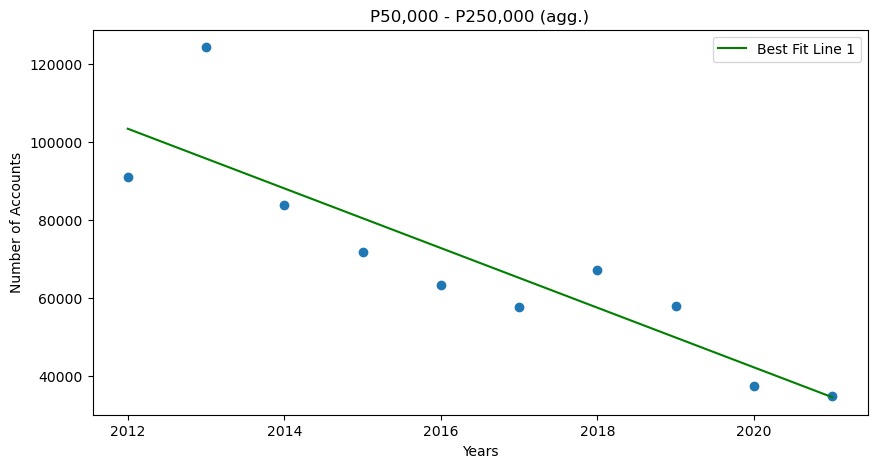

In [60]:
Company = 'BDO'
Deposit_Range = 'P50,000 - P250,000 (agg.)'

model = acc_growth(Company, Deposit_Range)
print(f'It is projected that in 2023, there will be {model[0] + model[1] * 2023} accounts with amounts between {Deposit_Range} in {Company}')